In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
import math
import statistics 
from sklearn.model_selection import cross_val_score

# Version 1

In [17]:
data = pd.read_csv("amazon_cells_labelled.txt",delimiter="\t",names = ['Comment','Positive Score'])
data.head()

,Comment,Positive Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


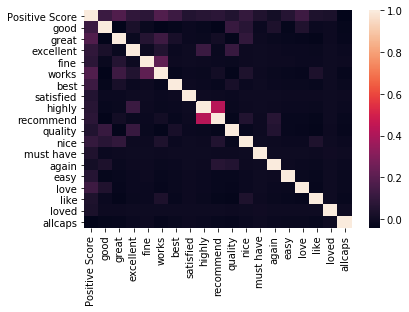

In [18]:
data = pd.read_csv("amazon_cells_labelled.txt",delimiter="\t",names = ['Comment','Positive Score'])
keywords = ['good', 'great', 'excellent', 'fine', 'works', 'best', 'satisfied', 'highly', 'recommend','quality','nice', 'must have', 'again', 'easy', 'love', 'like','loved']

for key in keywords:
    data[str(key)] = data.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data['allcaps'] = data.Comment.str.isupper()
data['Positive Score'] = (data['Positive Score'] == 1)

sns.heatmap(data.corr())
plt.show()

In [19]:
dataset = data[keywords + ['allcaps']]
target = data['Positive Score']

bnb = BernoulliNB()
bnb.fit(dataset, target)
y_pred = bnb.predict(dataset)
print("Number of mislabeled points out of a total {} points : {}".format(
    dataset.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 347


In [20]:
(target == y_pred).sum() / dataset.shape[0]

0.653

In [21]:
confusion_matrix(target, y_pred)

array([[456,  44],
       [303, 197]], dtype=int64)

In [22]:
data.iloc[:,1].value_counts()

True     500
False    500
Name: Positive Score, dtype: int64

Here we see our data is perfectly balanced.

In [26]:
cross_val_score(bnb, dataset, target, cv=10)

array([0.7 , 0.66, 0.65, 0.65, 0.66, 0.6 , 0.68, 0.64, 0.65, 0.62])

We see the cross validation scores slightly fluctuate. Our model may be overfitted a bit. 

# Version 2

In the version, we will limit the number of features by discarding the poorly correlated items. This was due to our model looking a bit overfitted from the cross validation scores. 

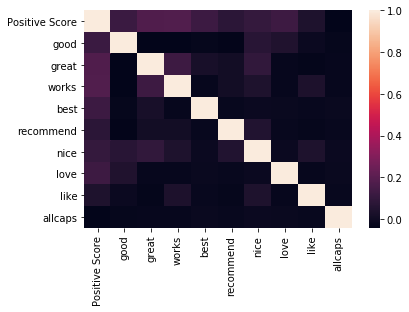

In [42]:
data = pd.read_csv("amazon_cells_labelled.txt",delimiter="\t",names = ['Comment','Positive Score'])
keywords = ['good', 'great', 'works', 'best', 'recommend','nice', 'love', 'like']

for key in keywords:
    data[str(key)] = data.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data['allcaps'] = data.Comment.str.isupper()
data['Positive Score'] = (data['Positive Score'] == 1)

sns.heatmap(data.corr())
plt.show()

In [43]:
dataset = data[keywords + ['allcaps']]
target = data['Positive Score']

bnb = BernoulliNB()
bnb.fit(dataset, target)
y_pred = bnb.predict(dataset)
print("Number of mislabeled points out of a total {} points : {}".format(
    dataset.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 370


In [44]:
(target == y_pred).sum() / dataset.shape[0]

0.63

In [45]:
confusion_matrix(target, y_pred)

array([[471,  29],
       [341, 159]], dtype=int64)

In [46]:
cross_val_score(bnb, dataset, target, cv=10)

array([0.64, 0.66, 0.66, 0.64, 0.64, 0.59, 0.64, 0.6 , 0.65, 0.58])

# Version 3

In this new version, we have reduced the number of feature significantly while only losing 2% accuracy. The cross validation scores fluctuate slightly less which means we reduced the amount of overfitting. While sitting at 63% is better than the 50% base chance prediction rate, we need to improve our features to increase this number.

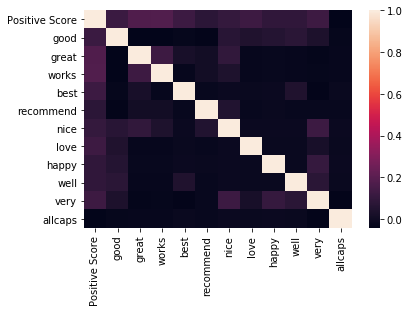

In [103]:
data = pd.read_csv("amazon_cells_labelled.txt",delimiter="\t",names = ['Comment','Positive Score'])
keywords = ['good', 'great', 'works', 'best', 'recommend','nice', 'love', 'happy', 'well', 'very', 'happy']

for key in keywords:
    data[str(key)] = data.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data['allcaps'] = data.Comment.str.isupper()
data['Positive Score'] = (data['Positive Score'] == 1)

sns.heatmap(data.corr())
plt.show()

In [104]:
dataset = data[keywords + ['allcaps']]
target = data['Positive Score']

bnb = BernoulliNB()
bnb.fit(dataset, target)
y_pred = bnb.predict(dataset)
print("Number of mislabeled points out of a total {} points : {}".format(
    dataset.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 344


In [105]:
(target == y_pred).sum() / dataset.shape[0]

0.656

In [106]:
confusion_matrix(target, y_pred)

array([[456,  44],
       [300, 200]], dtype=int64)

In [107]:
cross_val_score(bnb, dataset, target, cv=10)

array([0.7 , 0.61, 0.71, 0.64, 0.68, 0.65, 0.65, 0.66, 0.67, 0.59])

While we have slightly increased the accuracy of the model by adding and removing certain features, it seems that we have also increased the overfitting. It seems that this specific model has reached its peak. Maybe it is best to try something new.

# Version 4

In this version, instead of looking for positive comments, we will classify the negative ones.

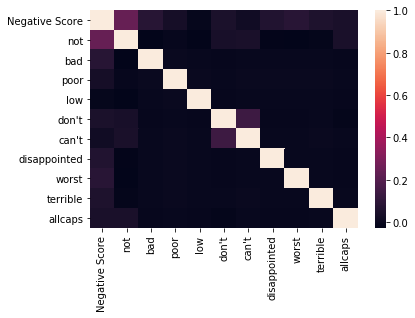

In [111]:
data = pd.read_csv("amazon_cells_labelled.txt",delimiter="\t",names = ['Comment','Negative Score'])
keywords = ['not', 'bad', 'poor', 'low', "don't", "can't", 'disappointed', 'worst', 'terrible' ]

for key in keywords:
    data[str(key)] = data.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data['allcaps'] = data.Comment.str.isupper()
data['Negative Score'] = (data['Negative Score'] == 0)

sns.heatmap(data.corr())
plt.show()

In [112]:
dataset = data[keywords + ['allcaps']]
target = data['Negative Score']

bnb = BernoulliNB()
bnb.fit(dataset, target)
y_pred = bnb.predict(dataset)
print("Number of mislabeled points out of a total {} points : {}".format(
    dataset.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 402


In [113]:
(target == y_pred).sum() / dataset.shape[0]

0.598

In [114]:
confusion_matrix(target, y_pred)

array([[477,  23],
       [379, 121]], dtype=int64)

In [115]:
cross_val_score(bnb, dataset, target, cv=10)

array([0.58, 0.6 , 0.57, 0.63, 0.61, 0.53, 0.64, 0.58, 0.64, 0.57])

The first attempt at the negative model produced worse results. However, optimizing it may create a more powerful model.

# Version 5

This model will include better and more optimized features than the original negative model.

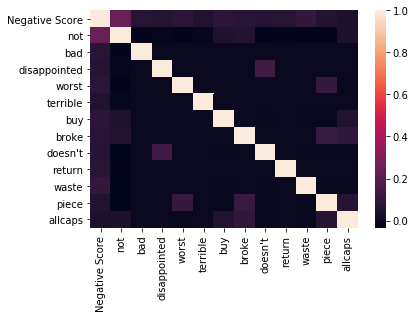

In [291]:
data = pd.read_csv("amazon_cells_labelled.txt",delimiter="\t",names = ['Comment','Negative Score'])
keywords = ['not', 'bad', 'disappointed', 'worst', 'terrible', 'buy', 'broke', "doesn't", 'return', 'waste', 'piece' ]

for key in keywords:
    data[str(key)] = data.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data['allcaps'] = data.Comment.str.isupper()
data['Comment'] = data['Comment'].str.replace(r'[^\w\s]+', '')
data['Negative Score'] = (data['Negative Score'] == 0)

sns.heatmap(data.corr())
plt.show()

In [292]:
dataset = data[keywords + ['allcaps']]
target = data['Negative Score']

bnb = BernoulliNB()
bnb.fit(dataset, target)
y_pred = bnb.predict(dataset)
print("Number of mislabeled points out of a total {} points : {}".format(
    dataset.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 370


In [293]:
(target == y_pred).sum() / dataset.shape[0]

0.63

In [294]:
confusion_matrix(target, y_pred)

array([[477,  23],
       [347, 153]], dtype=int64)

In [295]:
cross_val_score(bnb, dataset, target, cv=10)

array([0.64, 0.62, 0.63, 0.64, 0.63, 0.58, 0.68, 0.58, 0.67, 0.63])

It seems that the negative model is not quite as strong as the positive one. Even after optimization, it still falls behind the other model while still having the same amount of overfitting. 